C:\Users\abhim\AppData\Local\Temp\ipykernel_15392\1570298007.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


✅ Dataset Loaded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         1000 non-null   object 
 1   user_id                1000 non-null   int64  
 2   amount                 1000 non-null   float64
 3   timestamp              1000 non-null   object 
 4   country                1000 non-null   object 
 5   device                 1000 non-null   object 
 6   is_foreign             1000 non-null   int64  
 7   is_high_risk_country   1000 non-null   int64  
 8   prev_transactions_24h  1000 non-null   int64  
 9   avg_amount_30d         1000 non-null   float64
 10  label                  1000 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 86.1+ KB
None

🔹 Head:


,transaction_id,user_id,amount,timestamp,country,device,is_foreign,is_high_risk_country,prev_transactions_24h,avg_amount_30d,label
0,b6f350a8c62e,73996,13.03,2025-04-05T10:39:56.743254,IN,macOS,1,1,5,40.34,0
1,0d8349b8c2ad,60208,164.39,2025-04-18T05:27:32.743394,US,Windows,0,0,1,65.94,0
2,fde563c2ede3,91907,160.86,2025-04-28T11:34:31.743458,US,Android,0,0,5,90.60,0
3,f242c8380397,99635,102.72,2025-05-18T01:04:56.743498,IN,iOS,1,1,0,53.07,0
4,f00fd63e79df,89935,19.55,2025-03-22T18:28:16.743526,IN,Windows,1,1,1,48.07,0



🔸 Fraud Distribution:
label
0    98.2
1     1.8
Name: proportion, dtype: float64


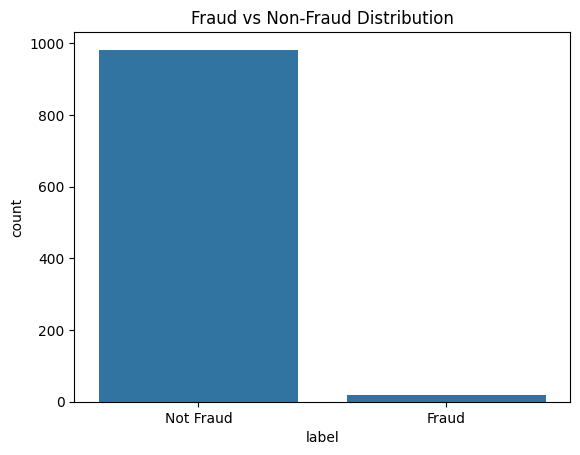

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("data/raw/sample_1k.csv")

# Display basic info
print("✅ Dataset Loaded\n")
print(df.info())
print("\n🔹 Head:")
display(df.head())

# Class distribution
print("\n🔸 Fraud Distribution:")
print(df['label'].value_counts(normalize=True) * 100)
sns.countplot(data=df, x='label')
plt.title("Fraud vs Non-Fraud Distribution")
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.show()


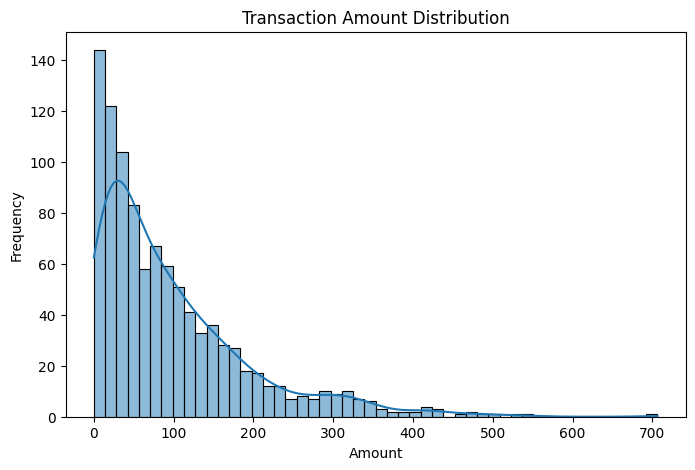

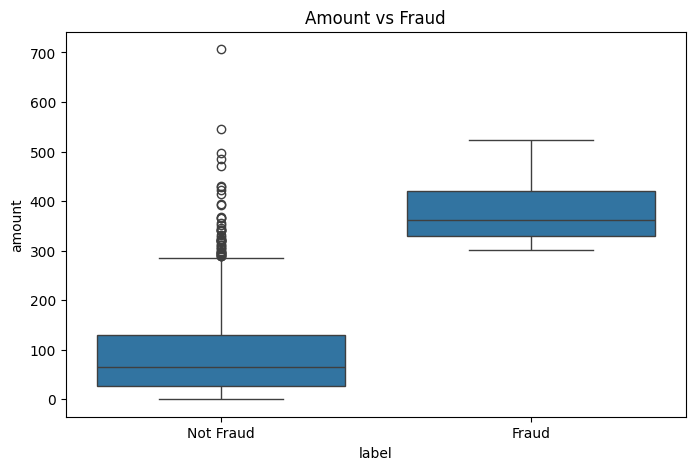

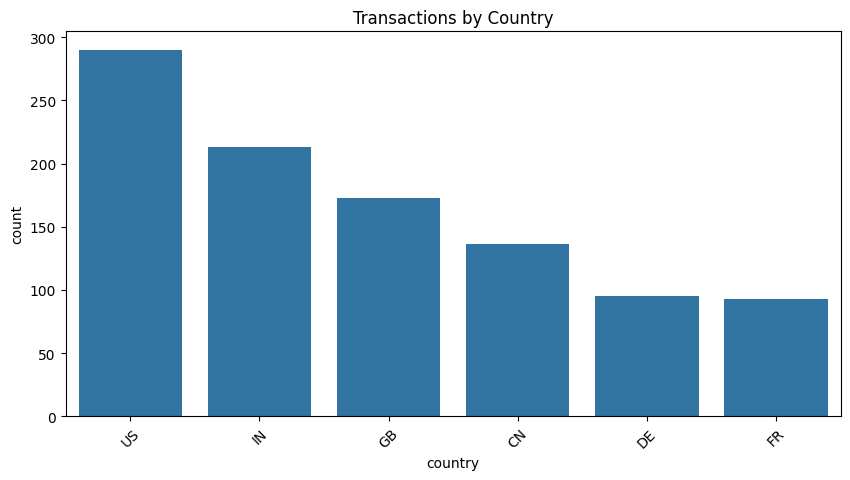

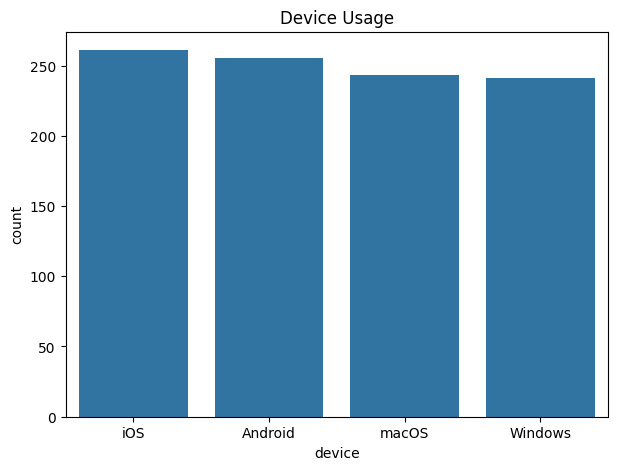

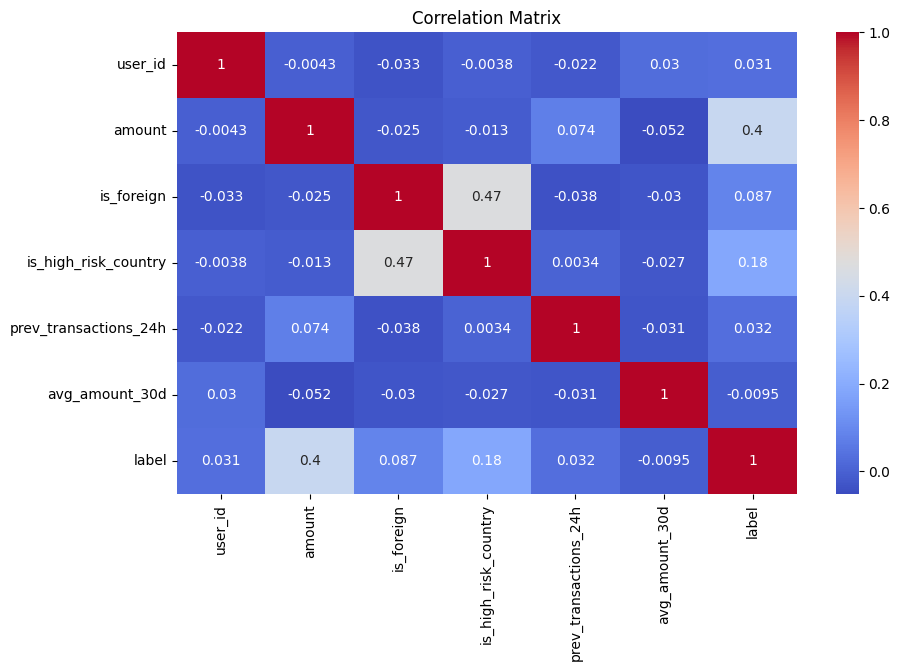

In [3]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Histogram of transaction amounts
plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Amount vs Label (Fraud or Not)
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='amount', data=df)
plt.title('Amount vs Fraud')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

# Countplot of Country
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title('Transactions by Country')
plt.xticks(rotation=45)
plt.show()

# Device usage
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='device', order=df['device'].value_counts().index)
plt.title('Device Usage')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


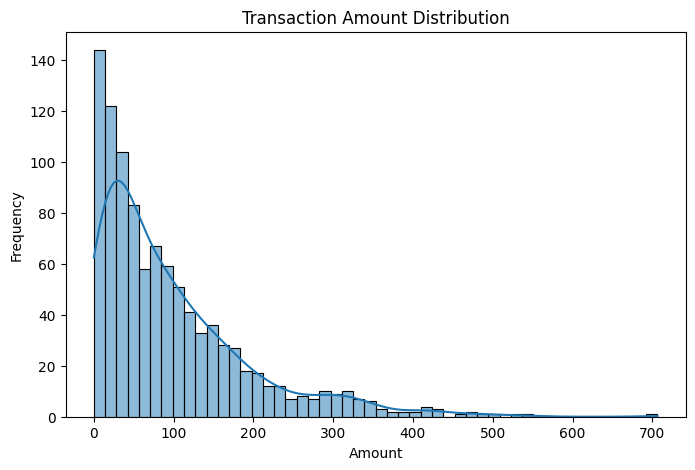

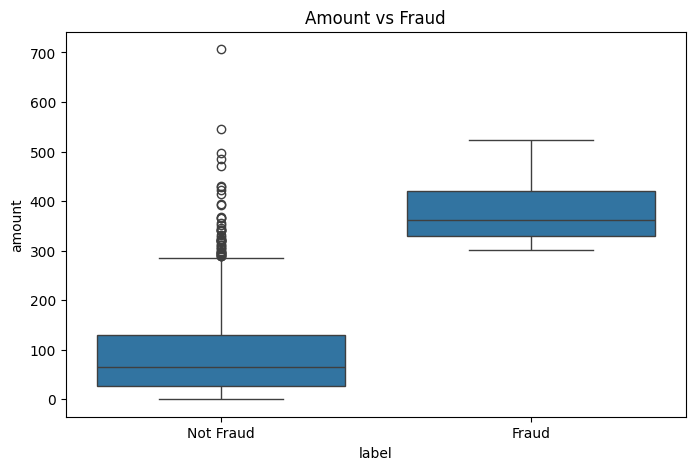

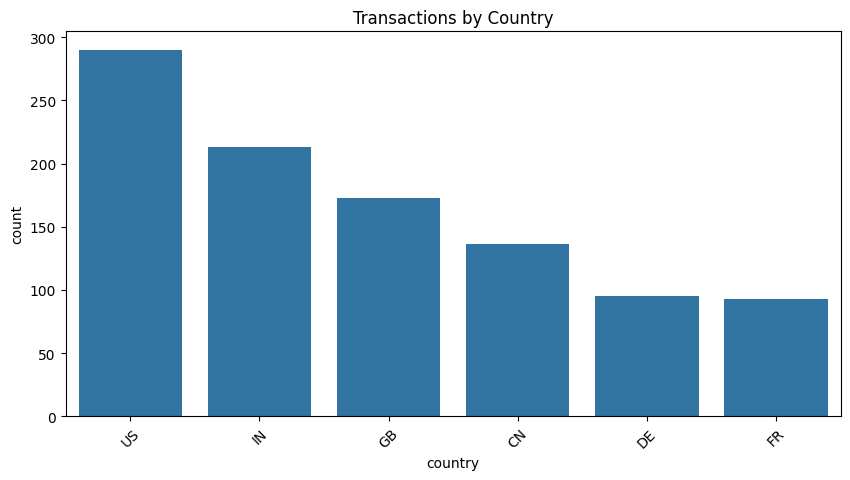

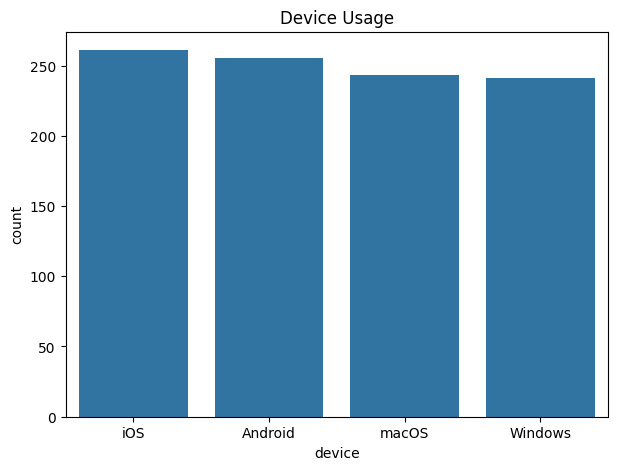

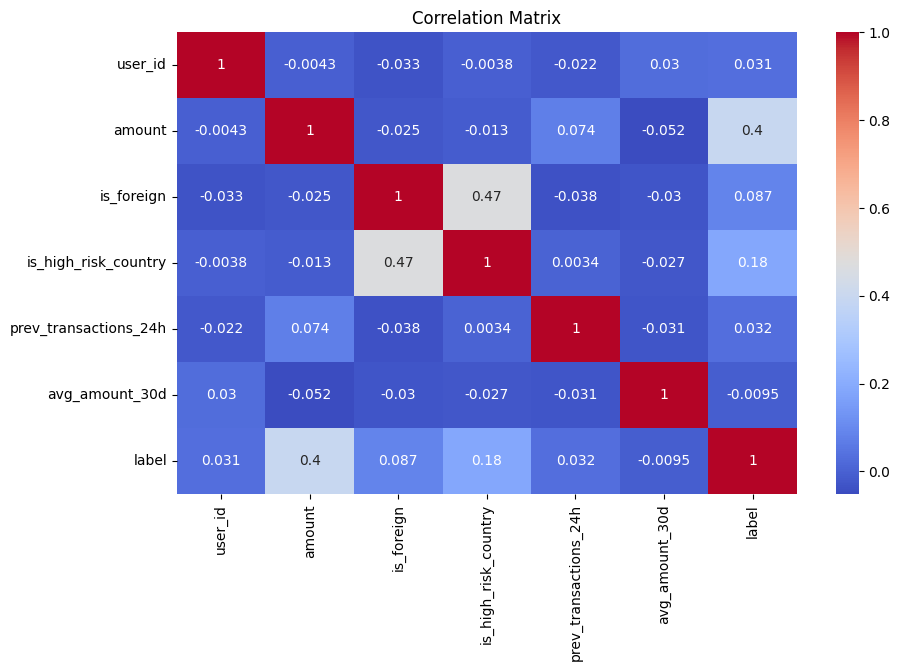

In [4]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Histogram of transaction amounts
plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Amount vs Label (Fraud or Not)
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='amount', data=df)
plt.title('Amount vs Fraud')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

# Countplot of Country
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title('Transactions by Country')
plt.xticks(rotation=45)
plt.show()

# Device usage
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='device', order=df['device'].value_counts().index)
plt.title('Device Usage')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [10]:
# Extract hour, day of week
df['hour_of_day'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday

# Flag for night transactions (12 AM - 6 AM)
df['is_night'] = df['hour_of_day'].apply(lambda x: 1 if 0 <= x <= 6 else 0)

# Difference between current amount and user's 30-day average
df['amount_diff_from_avg'] = df['amount'] - df['avg_amount_30d']

# Create a basic risk score (scale it later)
df['risk_score'] = (
    df['is_foreign'] * 1.5 +
    df['is_high_risk_country'] * 2.0 +
    df['is_night'] * 1.2 +
    df['amount_diff_from_avg'].apply(lambda x: abs(x) / 50)  # normalize difference
)


In [11]:
print(df.head())


  transaction_id  user_id  amount                  timestamp country   device  \
0   b6f350a8c62e    73996   13.03 2025-04-05 10:39:56.743254      IN    macOS   
1   0d8349b8c2ad    60208  164.39 2025-04-18 05:27:32.743394      US  Windows   
2   fde563c2ede3    91907  160.86 2025-04-28 11:34:31.743458      US  Android   
3   f242c8380397    99635  102.72 2025-05-18 01:04:56.743498      IN      iOS   
4   f00fd63e79df    89935   19.55 2025-03-22 18:28:16.743526      IN  Windows   

   is_foreign  is_high_risk_country  prev_transactions_24h  avg_amount_30d  \
0           1                     1                      5           40.34   
1           0                     0                      1           65.94   
2           0                     0                      5           90.60   
3           1                     1                      0           53.07   
4           1                     1                      1           48.07   

   label  hour_of_day  day_of_week  is_night

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the generated data
df = pd.read_csv("data/raw/sample_1k.csv")

# Quick overview
print("✅ Loaded DataFrame:")
display(df.head())
print("\nℹ️ DataFrame Info:")
print(df.info())


✅ Loaded DataFrame:


,transaction_id,user_id,amount,timestamp,country,device,is_foreign,is_high_risk_country,prev_transactions_24h,avg_amount_30d,label
0,b6f350a8c62e,73996,13.03,2025-04-05T10:39:56.743254,IN,macOS,1,1,5,40.34,0
1,0d8349b8c2ad,60208,164.39,2025-04-18T05:27:32.743394,US,Windows,0,0,1,65.94,0
2,fde563c2ede3,91907,160.86,2025-04-28T11:34:31.743458,US,Android,0,0,5,90.60,0
3,f242c8380397,99635,102.72,2025-05-18T01:04:56.743498,IN,iOS,1,1,0,53.07,0
4,f00fd63e79df,89935,19.55,2025-03-22T18:28:16.743526,IN,Windows,1,1,1,48.07,0



ℹ️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         1000 non-null   object 
 1   user_id                1000 non-null   int64  
 2   amount                 1000 non-null   float64
 3   timestamp              1000 non-null   object 
 4   country                1000 non-null   object 
 5   device                 1000 non-null   object 
 6   is_foreign             1000 non-null   int64  
 7   is_high_risk_country   1000 non-null   int64  
 8   prev_transactions_24h  1000 non-null   int64  
 9   avg_amount_30d         1000 non-null   float64
 10  label                  1000 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 86.1+ KB
None


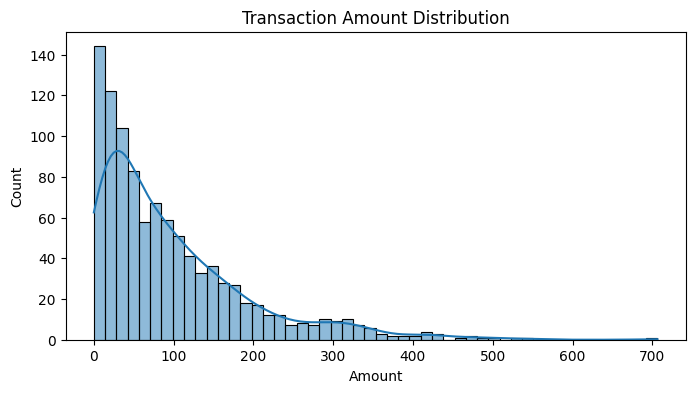

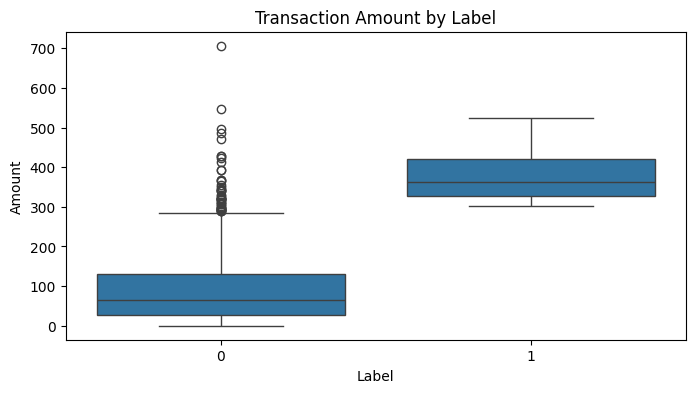

In [13]:
# Transaction amount distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.show()

# Amount by label
plt.figure(figsize=(8, 4))
sns.boxplot(x='label', y='amount', data=df)
plt.title("Transaction Amount by Label")
plt.xlabel("Label")
plt.ylabel("Amount")
plt.show()


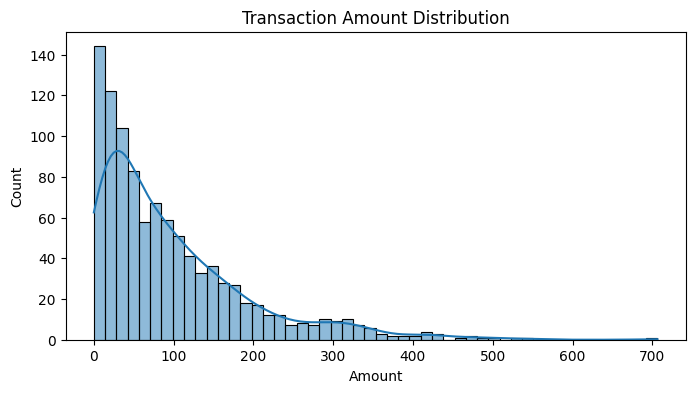

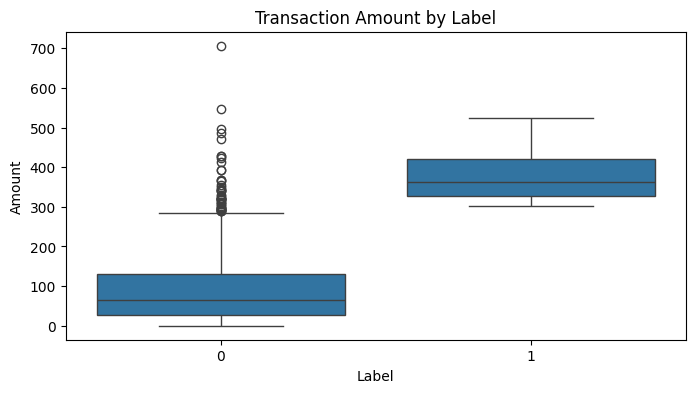

In [14]:
# Transaction amount distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.show()

# Amount by label
plt.figure(figsize=(8, 4))
sns.boxplot(x='label', y='amount', data=df)
plt.title("Transaction Amount by Label")
plt.xlabel("Label")
plt.ylabel("Amount")
plt.show()


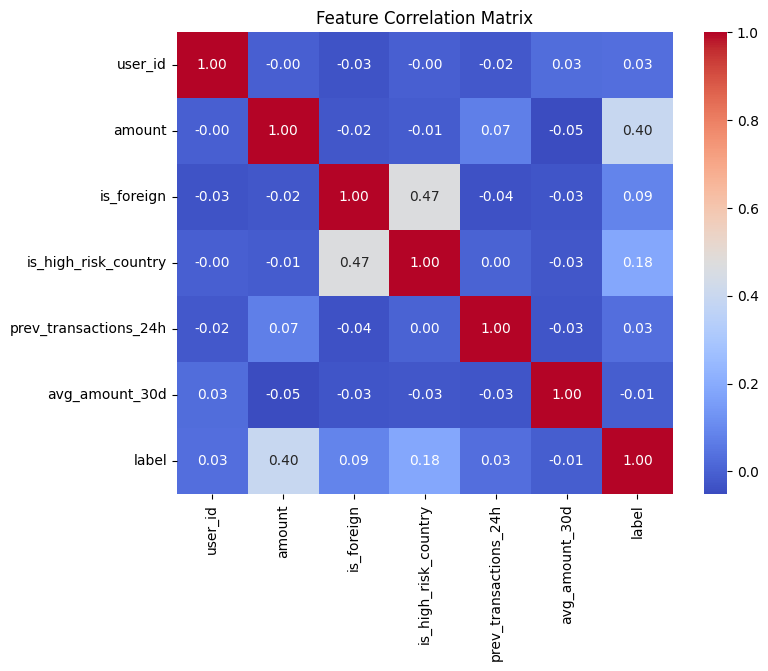

In [15]:
# Convert timestamp to datetime for feature engineering later
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Optional: drop non-numeric before corr
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [16]:
# Extract hour, day of week
df['hour_of_day'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek  # Monday=0, Sunday=6

# Flag for night transactions (midnight–6 AM)
df['is_night'] = df['hour_of_day'].apply(lambda hr: 1 if 0 <= hr <= 6 else 0)


In [17]:
display(df[['timestamp', 'hour_of_day', 'day_of_week', 'is_night']].head())


,timestamp,hour_of_day,day_of_week,is_night
0,2025-04-05 10:39:56.743254,10,5,0
1,2025-04-18 05:27:32.743394,5,4,1
2,2025-04-28 11:34:31.743458,11,0,0
3,2025-05-18 01:04:56.743498,1,6,1
4,2025-03-22 18:28:16.743526,18,5,0


In [18]:
# Difference from user’s 30‑day average
df['amount_diff_from_avg'] = df['amount'] - df['avg_amount_30d']

# Composite risk score:
# 1.5× foreign, 2× high‑risk country, 1.2× night, normalized amount diff
df['risk_score'] = (
    df['is_foreign'] * 1.5 +
    df['is_high_risk_country'] * 2.0 +
    df['is_night'] * 1.2 +
    df['amount_diff_from_avg'].abs().div(50)
)


In [19]:
display(df[['amount', 'avg_amount_30d', 'amount_diff_from_avg', 'risk_score']].head())


,amount,avg_amount_30d,amount_diff_from_avg,risk_score
0,13.03,40.34,-27.31,4.0462
1,164.39,65.94,98.45,3.1690
2,160.86,90.60,70.26,1.4052
3,102.72,53.07,49.65,5.6930
4,19.55,48.07,-28.52,4.0704


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1) Define X and y
X = df.drop(columns=['transaction_id', 'timestamp', 'label'])
y = df['label']

# 2) List feature types
numeric_features   = ['amount', 'prev_transactions_24h', 'avg_amount_30d',
                      'hour_of_day', 'day_of_week', 'amount_diff_from_avg', 'risk_score']
categorical_features = ['country', 'device']
binary_features    = ['is_foreign', 'is_high_risk_country', 'is_night']

# 3) Build ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)
], remainder='passthrough')  # leaves binary_features as-is

# 4) Fit & transform X
X_prepared = preprocessor.fit_transform(X)

# 5) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Preprocessing complete. Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1) Define X and y
X = df.drop(columns=['transaction_id', 'timestamp', 'label'])
y = df['label']

# 2) List feature types
numeric_features     = ['amount', 'prev_transactions_24h', 'avg_amount_30d',
                        'hour_of_day', 'day_of_week', 'amount_diff_from_avg', 'risk_score']
categorical_features = ['country', 'device']
binary_features      = ['is_foreign', 'is_high_risk_country', 'is_night']

# 3) Build ColumnTransformer with updated parameter name
preprocessor = ColumnTransformer(transformers=[
    ('num',   StandardScaler(),                          numeric_features),
    ('cat',   OneHotEncoder(drop='first', sparse_output=False), categorical_features)
], remainder='passthrough')  # leaves binary_features as-is

# 4) Fit & transform X
X_prepared = preprocessor.fit_transform(X)

# 5) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Preprocessing complete. Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


✅ Preprocessing complete. Shapes:
X_train: (800, 19), X_test: (200, 19)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1) Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2) Fit on the training data
clf.fit(X_train, y_train)

# 3) Predict on the test set
y_pred = clf.predict(X_test)

# 4) Classification report
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Legit", "Fraud"]))

# 5) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("🔹 Confusion Matrix:")
print(cm)


🔍 Classification Report:
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00       196
       Fraud       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

🔹 Confusion Matrix:
[[196   0]
 [  0   4]]


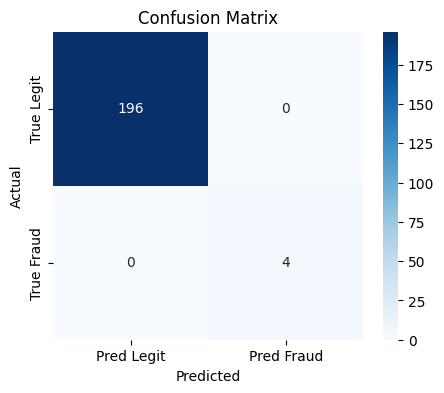

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Pred Legit", "Pred Fraud"],
            yticklabels=["True Legit", "True Fraud"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_prepared, y, cv=5, scoring='f1_macro')
print("CV F1‑macro scores:", scores)
print("Mean F1‑macro:", scores.mean())


CV F1‑macro scores: [1.         1.         0.92729916 1.         1.        ]
Mean F1‑macro: 0.985459832788077


In [25]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 1) Define parameter distributions
param_dist = {
    'classifier__n_estimators': [100, 200, 500, 1000],
    'classifier__max_depth': [None, 10, 20, 30, 50],
    'classifier__min_samples_split': [2, 5, 10, 20]
}

# 2) Wrap your existing pipeline
#    (we originally named it "pipeline"; if yours is named "clf" adjust accordingly)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,            # number of random combinations to try
    cv=5,                 # 5‑fold cross‑validation
    scoring='f1_macro',   # optimize macro F1
    verbose=2,            # show progress
    random_state=42,
    n_jobs=-1             # use all CPUs
)

# 3) Fit on the full dataset (or only training set)
search.fit(X_train, y_train)

# 4) View best results
print("🔍 Best Hyperparameters:")
print(search.best_params_)
print(f"🏆 Best CV F1‑macro: {search.best_score_:.4f}")



NameError: name 'pipeline' is not defined

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Assuming you already have `preprocessor`, X_train, y_train in scope

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Quick sanity check: fit & score on train
pipeline.fit(X_train, y_train)
print("Sanity check train score:", pipeline.score(X_train, y_train))


ValueError: Specifying the columns using strings is only supported for dataframes.

In [27]:
from sklearn.model_selection import train_test_split

# Raw feature matrix & target
X_raw = df.drop(columns=['transaction_id','timestamp','label'])
y     = df['label']

# Split raw DataFrame (not the pre‑transformed one)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("✅ Raw split shapes:")
print("X_train_raw:", X_train_raw.shape, "X_test_raw:", X_test_raw.shape)


✅ Raw split shapes:
X_train_raw: (800, 13) X_test_raw: (200, 13)


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),                # defined earlier
    ('classifier', RandomForestClassifier(random_state=42))
])

# Sanity check: fit on raw training data
pipeline.fit(X_train_raw, y_train)
print("Sanity check — pipeline train score:", pipeline.score(X_train_raw, y_train))


Sanity check — pipeline train score: 1.0


In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid for the classifier step
param_dist = {
    'classifier__n_estimators':     [100, 200, 500, 1000],
    'classifier__max_depth':        [None, 10, 20, 30, 50],
    'classifier__min_samples_split': [2, 5, 10, 20]
}

search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,            # try 20 random combinations
    cv=5,                 # 5‑fold CV
    scoring='f1_macro',   # optimize macro F1
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on the raw training set
search.fit(X_train_raw, y_train)

# Output best parameters and score
print("🔍 Best Hyperparameters:", search.best_params_)
print("🏆 Best CV F1‑macro:   ", search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔍 Best Hyperparameters: {'classifier__n_estimators': 500, 'classifier__min_samples_split': 5, 'classifier__max_depth': 10}
🏆 Best CV F1‑macro:    0.9290496282901346


In [30]:
from sklearn.model_selection import RandomizedSearchCV

# 1) Define the parameter distributions for the Random Forest step
param_dist = {
    'classifier__n_estimators': [100, 200, 500, 1000],
    'classifier__max_depth': [None, 10, 20, 30, 50],
    'classifier__min_samples_split': [2, 5, 10, 20]
}

# 2) Set up RandomizedSearchCV on your existing pipeline
search = RandomizedSearchCV(
    estimator=pipeline,            # your Pipeline object: preprocessor + classifier
    param_distributions=param_dist,
    n_iter=20,                     # try 20 random hyperparameter combinations
    cv=5,                          # 5-fold cross-validation
    scoring='f1_macro',            # optimize for macro-averaged F1 score
    verbose=2,                     # show progress
    random_state=42,
    n_jobs=-1                      # use all available CPU cores
)

# 3) Fit the search on the RAW training set
search.fit(X_train_raw, y_train)

# 4) Inspect the best results
print("🔍 Best Hyperparameters:", search.best_params_)
print("🏆 Best CV F1‑macro:   ", search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔍 Best Hyperparameters: {'classifier__n_estimators': 500, 'classifier__min_samples_split': 5, 'classifier__max_depth': 10}
🏆 Best CV F1‑macro:    0.9290496282901346


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve the best estimator
best_model = search.best_estimator_

# Predict on the raw test set
y_pred_tuned = best_model.predict(X_test_raw)

# 1) Classification report
print("🔄 Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=["Legit", "Fraud"]))

# 2) Confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)
print("🔹 Confusion Matrix:\n", cm)

# 3) Visualize the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Legit", "Pred Fraud"],
            yticklabels=["True Legit", "True Fraud"])
plt.title("Tuned Model Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Assuming you already have `preprocessor`, X_train, y_train in scope

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Quick sanity check: fit & score on train
pipeline.fit(X_train, y_train)
print("Sanity check train score:", pipeline.score(X_train, y_train))


ValueError: Specifying the columns using strings is only supported for dataframes.

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Assuming you already have `preprocessor`, X_train, y_train in scope

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Quick sanity check: fit & score on train
pipeline.fit(X_train, y_train)
print("Sanity check train score:", pipeline.score(X_train, y_train))


ValueError: Specifying the columns using strings is only supported for dataframes.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Assuming you already have `preprocessor`, X_train, y_train in scope

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Quick sanity check: fit & score on train
pipeline.fit(X_train, y_train)
print("Sanity check train score:", pipeline.score(X_train, y_train))


ValueError: Specifying the columns using strings is only supported for dataframes.

🔄 Tuned Model Classification Report:
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00       196
       Fraud       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

🔹 Confusion Matrix:
 [[196   0]
 [  0   4]]


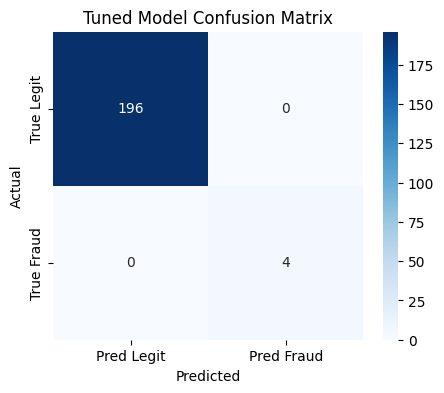

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve the best estimator
best_model = search.best_estimator_

# Predict on the raw test set
y_pred_tuned = best_model.predict(X_test_raw)

# 1) Classification report
print("🔄 Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=["Legit", "Fraud"]))

# 2) Confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)
print("🔹 Confusion Matrix:\n", cm)

# 3) Visualize the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Legit", "Pred Fraud"],
            yticklabels=["True Legit", "True Fraud"])
plt.title("Tuned Model Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [33]:
import pandas as pd

# Extract one-hot feature names
ohe = best_model.named_steps['preprocessor'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(['country', 'device']).tolist()

# Combine all feature names in the order used by the pipeline
feature_names = (
    numeric_features +
    ohe_features +
    binary_features
)

# Get importances
importances = best_model.named_steps['classifier'].feature_importances_

# Build a DataFrame for easy viewing
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Show top 10 features
print("🌟 Top 10 Important Features:")
display(feat_imp_df.head(10))


ValueError: All arrays must be of the same length

In [34]:
import pandas as pd

# 1) Grab the fitted preprocessor from your best pipeline
fitted_prep = best_model.named_steps['preprocessor']

# 2) Ask it for the exact output feature names
feature_names = fitted_prep.get_feature_names_out()

# 3) Pull the importances from the classifier
importances   = best_model.named_steps['classifier'].feature_importances_

# 4) Build the DataFrame (lengths will now match)
feat_imp_df = pd.DataFrame({
    'feature':    feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 5) Display the top 10
print("🌟 Top 10 Important Features:")
display(feat_imp_df.head(10))


🌟 Top 10 Important Features:


,feature,importance
6,num__risk_score,0.359546
0,num__amount,0.193875
5,num__amount_diff_from_avg,0.176575
17,remainder__is_high_risk_country,0.115011
2,num__avg_amount_30d,0.030905
10,cat__country_IN,0.024327
15,remainder__user_id,0.016969
9,cat__country_GB,0.016884
3,num__hour_of_day,0.016056
1,num__prev_transactions_24h,0.013334


In [35]:
import joblib

# Save the tuned pipeline
joblib.dump(best_model, "C:/Users/Abhishek/fraud_dataset/models/fraud_detector_tuned_pipeline.pkl")
print("💾 Saved tuned pipeline to models/fraud_detector_tuned_pipeline.pkl")


💾 Saved tuned pipeline to models/fraud_detector_tuned_pipeline.pkl
